In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_path = './Datasets/Regression 1.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()


,X1,X2,X3,X3.1,X4,X5,X6,Y
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
# 1. Check for missing values
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

X1      0
X2      0
X3      0
X3.1    0
X4      0
X5      0
X6      0
Y       0
dtype: int64


In [8]:

# 2. Feature Scaling
X = df[['X1', 'X2', 'X3', 'X3.1', 'X4', 'X5', 'X6']]
y = df['Y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:

# 3. Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predicting the test set results
y_pred = model.predict(X_test)


In [10]:

# 6. Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 5.055541144299383
R-Squared: 0.5329844757724522


## Visualization of Linear Regression Results

### 1. Scatter Plot with Regression Line

The **scatter plot** is used to visualize the relationship between the actual and predicted values of the target variable (Y). Each point represents a prediction made by the model against the actual value. 

- **Purpose**: 
  - To assess how closely the predicted values align with the actual values.
  - The red line in the plot indicates the ideal scenario where predicted values equal actual values. The closer the data points are to this line, the better the model's performance.

### 2. Residual Plot

The **residual plot** displays the residuals (the difference between the actual values and predicted values) on the y-axis against the predicted values on the x-axis.

- **Purpose**:
  - To evaluate the model's assumptions regarding linearity and homoscedasticity (constant variance of errors).
  - If the residuals are randomly scattered around the horizontal line (y=0), it indicates that the model has captured the relationship adequately.
  - Patterns or systematic structures in this plot suggest that the model could be improved, potentially through the inclusion of additional features or polynomial terms.

### 3. Distribution of Residuals

This plot shows the distribution of the residuals, often using a histogram with a kernel density estimate (KDE) overlay.

- **Purpose**:
  - To check whether the residuals are normally distributed, which is one of the assumptions of linear regression.
  - A normal distribution of residuals implies that the model's predictions are unbiased and that the errors are evenly distributed, further validating the model's reliability.

### 4. Feature Importance (Coefficient Magnitudes)

The **feature importance plot** displays the coefficients of each feature used in the linear regression model.

- **Purpose**:
  - To understand the impact of each feature on the target variable (Y). 
  - Positive coefficients indicate a direct relationship with the target, while negative coefficients suggest an inverse relationship.
  - This plot allows us to identify which features contribute most significantly to the prediction, aiding in feature selection and model refinement.


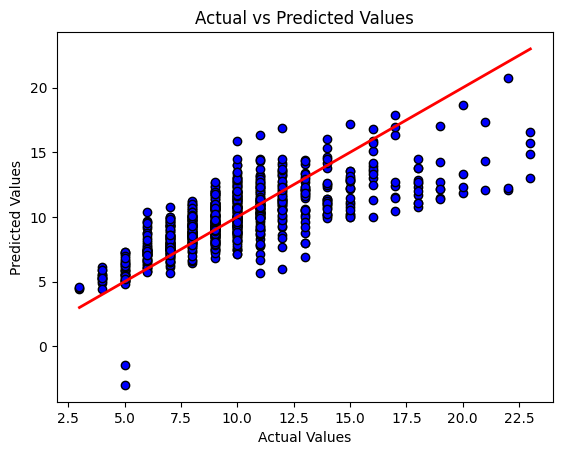

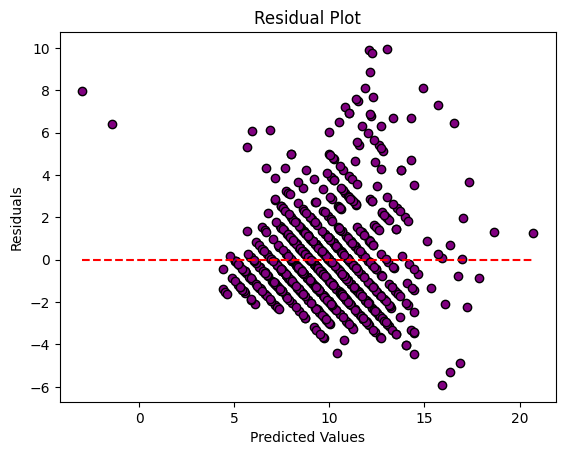

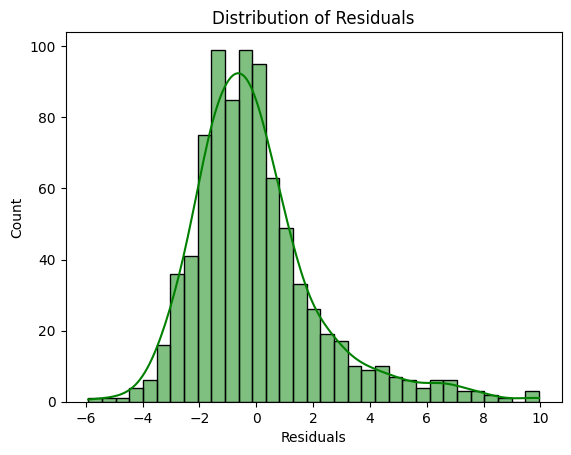

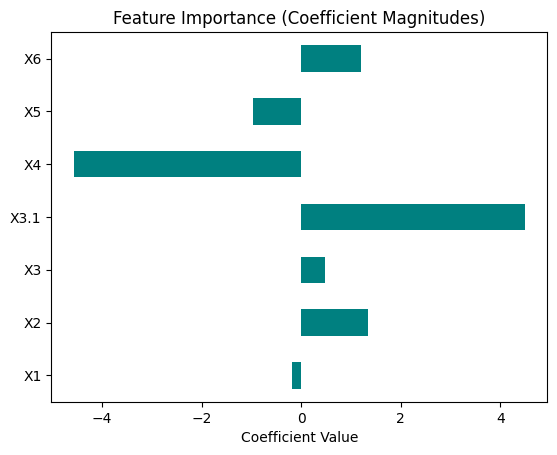

In [11]:

# 7. Visualization: Scatter Plot with Regression Line
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 8. Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple', edgecolor='k')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 9. Distribution of Residuals
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# 10. Feature Importance (Coefficient Magnitudes)
coef = pd.Series(model.coef_, index=['X1', 'X2', 'X3', 'X3.1', 'X4', 'X5', 'X6'])
coef.plot(kind='barh', color='teal')
plt.title('Feature Importance (Coefficient Magnitudes)')
plt.xlabel('Coefficient Value')
plt.show()
